In [220]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import time
import pandas as pd
from selenium.webdriver.support.ui import Select
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.keys import Keys
import plotly.express as px
import seaborn as sns
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import re
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

In [49]:
opciones=Options()

opciones.add_experimental_option('excludeSwitches', ['enable-automation'])
opciones.add_experimental_option('useAutomationExtension', False)
opciones.headless=False    
opciones.add_argument('--start-maximized')        
opciones.add_argument('user-data-dir=selenium')    
opciones.add_argument('--incognito')             

In [50]:
driver = webdriver.Chrome("./chromedriver.exe")
url= "https://kenayhome.com/es/"
driver.get(url)
driver.implicitly_wait(5)
driver.find_element_by_css_selector("#ocr_home > div > div.col-container.row.sp-custom-4-1629202034759 > div.ocr_block_category.col-12.col-xl-6.float-right > div > span.ocr_home_box_content > span").click()

modelos=[]
precios_rebajado=[]
precios_originales=[]
plazo_entrega=[]
for sofa in range(1,36):
    try:
        modelos.append(driver.find_element_by_xpath(f"/html/body/div[1]/div[2]/div/div[2]/div[5]/div[2]/div[{sofa}]/div/div[2]/h2/a").text)
        precios_rebajado.append(driver.find_element_by_xpath(f"/html/body/div[1]/div[2]/div/div[2]/div[5]/div[2]/div[{sofa}]/div/div[2]/p/span[2]").text)
        precios_originales.append(driver.find_element_by_xpath(f"/html/body/div[1]/div[2]/div/div[2]/div[5]/div[2]/div[{sofa}]/div/div[2]/p/span[1]").text)
        plazo_entrega.append(driver.find_element_by_xpath(f"/html/body/div[1]/div[2]/div/div[2]/div[5]/div[2]/div[{sofa}]/div/div[2]/div").text)
    except:
        print("no se puede")

<ipython-input-50-0aef7e9f8119>:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("./chromedriver.exe")
<ipython-input-50-0aef7e9f8119>:5: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_css_selector("#ocr_home > div > div.col-container.row.sp-custom-4-1629202034759 > div.ocr_block_category.col-12.col-xl-6.float-right > div > span.ocr_home_box_content > span").click()
<ipython-input-50-0aef7e9f8119>:13: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  modelos.append(driver.find_element_by_xpath(f"/html/body/div[1]/div[2]/div/div[2]/div[5]/div[2]/div[{sofa}]/div/div[2]/h2/a").text)
<ipython-input-50-0aef7e9f8119>:14: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  precios_rebajado.append(driver.find_element_by_xpath(f"/html/body/div[1]/div[2]/div

no se puede
no se puede
no se puede


In [23]:
modelos


['CRATE SOFÁ CHAISE PERLA',
 'DOLMEN SOFÁ CHAISE PERLA',
 'ONEL SOFÁ CAMA',
 'DOLMEN SOFÁ 3,5 PLAZAS CREMA',
 'AIR SOFÁ 3,5 PLAZAS PERLA',
 'BLOCK SOFÁ MODULAR',
 'AIR SOFÁ CHAISE GRIS CLARO',
 'SOHO SOFÁ',
 'OLYMPE SOFÁ',
 'ENZO BUTACA',
 'ZUIV BUTACA AQUA',
 'ZUIV BUTACA GRIS',
 'ORNEL PUF',
 'PIERO SOFÁ 3 PLAZAS',
 'PIERO SOFÁ',
 'OHIO SOFÁ',
 'JUNE SOFÁ CON ARCÓN',
 'CLAUD PUF ARCÓN MOSTAZA',
 'FRAYA BUTACA',
 'CLAUD PUF ARCÓN GRIS',
 'LOFT SOFÁ 2,5 PLAZAS',
 'DALLAS SOFÁ CAMA GRIS',
 'LOFT SOFÁ + PUF',
 'DALLAS SOFÁ CAMA BEIGE',
 'OWEN SOFÁ CAMA GRIS',
 'OWEN SOFÁ CAMA BEIGE',
 'SOUND SOFÁ',
 'FEZ SOFÁ 2 PLAZAS',
 'PENTA SOFÁ PATAS NATURAL 3 PLAZAS',
 'CRATE SOFÁ',
 'DUVER SOFÁ CAMA',
 'LUMB SOFÁ ELÉCTRICO']

In [24]:
precios_rebajado

['1.429,00 €',
 '1.435,35 €',
 '719,10 €',
 '929,00 €',
 '929,00 €',
 '999,00 €',
 '1.505,66 €',
 '899,00 €',
 '1.499,00 €',
 '242,10 €',
 '233,10 €',
 '233,10 €',
 '143,10 €',
 '499,00 €',
 '799,00 €',
 '1.299,00 €',
 '999,00 €',
 '53,10 €',
 '224,10 €',
 '53,10 €',
 '872,10 €',
 '341,10 €',
 '1.475,10 €',
 '341,10 €',
 '359,10 €',
 '359,10 €',
 '1.698,14 €',
 '1.079,10 €',
 '989,10 €',
 '1.673,33 €',
 '899,10 €',
 '1.889,10 €']

In [87]:
precios_originales

['2.479,00 €',
 '3.398,00 €',
 '799,00 €',
 '2.398,00 €',
 '2.398,00 €',
 '1.299,00 €',
 '3.398,00 €',
 '1.149,00 €',
 '1.699,00 €',
 '269,00 €',
 '259,00 €',
 '259,00 €',
 '159,00 €',
 '699,00 €',
 '1.099,00 €',
 '1.899,00 €',
 '1.159,00 €',
 '59,00 €',
 '249,00 €',
 '59,00 €',
 '1.140,00 €',
 '379,00 €',
 '1.928,24 €',
 '379,00 €',
 '399,00 €',
 '399,00 €',
 '3.198,00 €',
 '1.598,67 €',
 '1.099,00 €',
 '2.479,00 €',
 '999,00 €',
 '4.198,00 €']

In [88]:
plazo_entrega

['Envío en 7 días',
 'Envío en 7 días',
 'Envío en 35 días',
 'Envío en 25 días',
 'Envío en 25 días',
 'Envío en 7 días',
 'Envío en 7 días',
 'Envío en 35 días',
 'Envío en 7 días',
 'Envío en 24/72h',
 'Envío en 24/72h',
 'Envío en 24/72h',
 'Envío en 24/72h',
 'Envío en 7 días',
 'Envío en 15 días',
 'Envío en 7 días',
 'Envío en 20 días',
 'Envío en 24/72h',
 'Envío en 24/72h',
 'Envío en 24/72h',
 'Envío en 60 días',
 'Envío en 7 días',
 'Envío en 60 días',
 'Envío en 7 días',
 'Envío en 7 días',
 'Envío en 7 días',
 'Envío en 60 días',
 'Envío en 60 días',
 'Envío en 75 días',
 'Envío en 60 días',
 'Envío en 7 días',
 'Envío en 60 días']

In [89]:
df=pd.DataFrame(modelos,precios_rebajado).reset_index()

In [90]:
diccio_nuevas={"index":"precios_rebajado",0:"modelos"}

In [91]:
df.rename(columns = diccio_nuevas, inplace=True)

In [92]:
df["precios_original"]=precios_originales

In [94]:
df["plazo_entrega"]=plazo_entrega

In [96]:
def convert_float(x):
    return float(x.split(" ")[0].replace(".", "").replace(",", "."))

In [97]:
df["precios_original"]=df["precios_original"].apply(convert_float)

In [98]:
df["precios_rebajado"]=df["precios_rebajado"].apply(convert_float)

In [99]:
df["rebaja"]=df["precios_original"]-df["precios_rebajado"]

In [174]:
def tipo(x):
    dicc_tipo={
            "SOFÁ":re.search(".*[S](OFÁ).*",str(x)),
            "PUF":re.search(".*[P](UF).*",str(x)),
            "BUTACA":re.search(".*[B](UTACA).*",str(x))}
    for key,values in dicc_tipo.items():
        if values:
            return key

In [175]:
df["tipo"]=df["modelos"].apply(tipo)

In [176]:
df=df[['modelos','tipo','precios_original','precios_rebajado','rebaja','plazo_entrega']]

In [179]:
df

,modelos,tipo,precios_original,precios_rebajado,rebaja,plazo_entrega
0,CRATE SOFÁ CHAISE PERLA,SOFÁ,2479.00,1429.00,1050.00,Envío en 7 días
1,DOLMEN SOFÁ CHAISE PERLA,SOFÁ,3398.00,1435.35,1962.65,Envío en 7 días
2,ONEL SOFÁ CAMA,SOFÁ,799.00,719.10,79.90,Envío en 35 días
3,"DOLMEN SOFÁ 3,5 PLAZAS CREMA",SOFÁ,2398.00,929.00,1469.00,Envío en 25 días
4,"AIR SOFÁ 3,5 PLAZAS PERLA",SOFÁ,2398.00,929.00,1469.00,Envío en 25 días
5,BLOCK SOFÁ MODULAR,SOFÁ,1299.00,999.00,300.00,Envío en 7 días
6,AIR SOFÁ CHAISE GRIS CLARO,SOFÁ,3398.00,1505.66,1892.34,Envío en 7 días
7,SOHO SOFÁ,SOFÁ,1149.00,899.00,250.00,Envío en 35 días
8,OLYMPE SOFÁ,SOFÁ,1699.00,1499.00,200.00,Envío en 7 días
9,ENZO BUTACA,BUTACA,269.00,242.10,26.90,Envío en 24/72h


In [180]:
df.to_csv("kenay.csv")

In [181]:
kenay = pd.read_csv('kenay.csv', index_col=0)

### 1. El precio de ningún artículo superaba los 3,000 euros antes de la rebaja: FALSO- 4 de ellos superan ese precio.

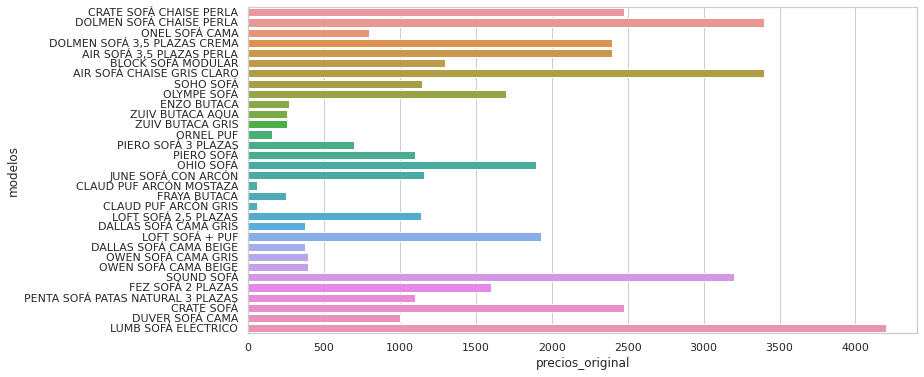

In [182]:
barplot = sns.barplot(x="precios_original", y="modelos", data=kenay,ci="sd");

In [211]:
barplot.figure.savefig("precio_original_1.jpg", dpi=1000,bbox_inches ="tight")

### 2. La mayoría de los artículos se entregan en el plazo de 7 días: VERDADERO.

In [183]:
datos = kenay['plazo_entrega'].value_counts()

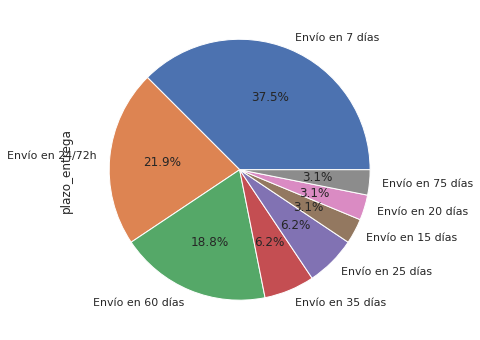

In [212]:
entrega=datos.plot.pie(autopct="%.1f%%");

In [213]:
entrega.figure.savefig("plazo_entrega_2.jpg", dpi=1000, bbox_inches ="tight")

### 3.  El 75% de los artículos están rebajados, al menos, en 900 euros: FALSO- Concretamente, la rebaja del 75% de los artículos es de, al menos, 651.42 €.

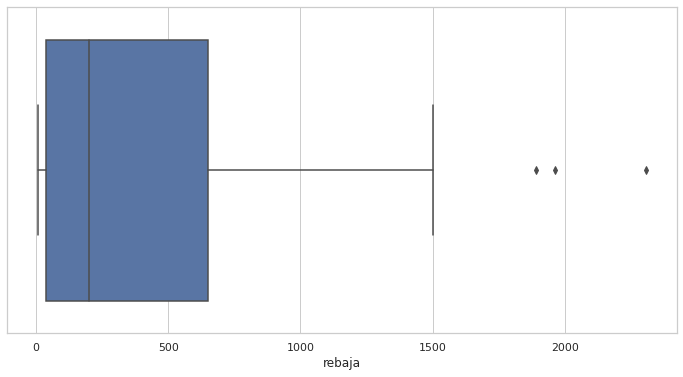

In [214]:
rebaja=sns.boxplot(x="rebaja", data=kenay);

In [186]:
kenay.rebaja.quantile(.75)

651.4175

In [215]:
rebaja.figure.savefig("rebaja_3.jpg", dpi=1000, bbox_inches ="tight")

### 4. Hay el mismo número de butacas rebajadas en Kenay que de pufs: FALSO- Hay una butaca más.

In [187]:
fig = px.bar(kenay, x=kenay.tipo.value_counts().index, y=kenay.tipo.value_counts().values)

In [188]:
fig

### 5. Los precios de los sofás tras la rebaja rondan los 1,000 euros de media: VERDADERO

In [197]:
agrupado=pd.DataFrame(kenay.groupby("tipo")["precios_rebajado"].mean()).reset_index()

In [198]:
agrupado

,tipo,precios_rebajado
0,BUTACA,233.1000
1,PUF,83.1000
2,SOFÁ,1036.6232


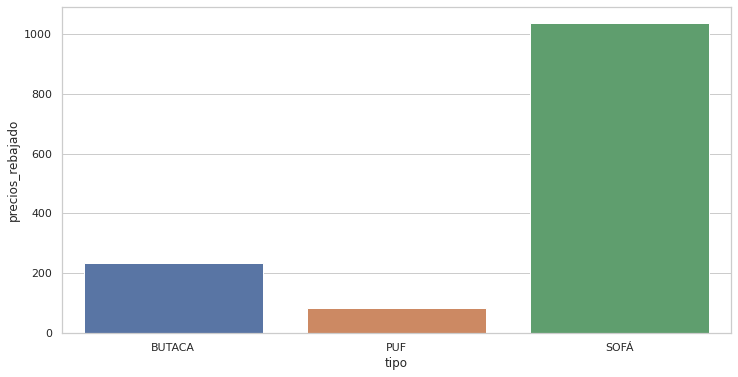

In [199]:
precio_rebajamedio = sns.barplot(x="tipo", y="precios_rebajado", data=agrupado,ci="sd");

In [219]:
precio_rebajamedio.figure.savefig("precio_medio_rebaja_5.jpg", dpi=1000, bbox_inches ="tight")